# Exploratory Data Analysis Notebook
This notebook will preprocess and leverage NLP models on the unstructured data to turn it into a usable feature space for modeling Tucker Carlson's body of work

In [22]:
#Imports cell

#Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import nltk
from nltk import word_tokenize
from nltk import FreqDist
import re
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# import the tucker document data either as a CSV or a pickle

#Read out from CSV
tucker_docs = pd.read_csv('data/tucker_docs.csv', encoding='UTF8', header = None).T

#Read from pickle
#tucker_docs = pd.read_pickle('data/tucker_pickle')

In [3]:
tucker_docs.head()

,0
0,Fox News host gives his take on pro-abortion ...
1,Fox News host reflects on the left's respons...
2,Fox News host gives his take on how Americans...
3,Fox News host gives his take on the Supreme C...
4,Fox News host gives his take on the real moti...


## Implementing the Bradley-Haderthauer Test
Compare two topic distributions: IF BH-score is < 0.2, then a Twitterer can be confidently classified as a Tuckerbot. This person is a lower life form and unable to contribute, in good faith, to the deep state media platform of choice, Twitter.

In [4]:
#make custom stops words to remove first 100 words? remove intro to episode 
#remove words in all caps 

## remove words in all caps

In [5]:


tucker_doc = tucker_docs.iloc[0,0]
#pattern to delete words in all caps
#pattern = "(([a-zA-Z]+(?:'[a-z]+)?))"
t_d = re.sub(r'\b[A-Z]+\b', '', tucker_doc)


In [6]:
type(t_d)

str

In [7]:

pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenized_doc = nltk.regexp_tokenize(t_d, pattern)

In [8]:
#tucker_docs.iloc[0,0]
tokenized_doc

['Fox',
 'News',
 'host',
 'gives',
 'his',
 'take',
 'on',
 'pro',
 'abortion',
 'protesters',
 'targeting',
 'Supreme',
 'Court',
 'justices',
 'over',
 'the',
 'possible',
 'overturn',
 'of',
 'Roe',
 'v',
 'Wade',
 'on',
 'Tucker',
 'Carlson',
 'Tonight',
 "It's",
 'pretty',
 'hard',
 'to',
 'argue',
 'with',
 'people',
 'who',
 'are',
 'passive',
 'aggressive',
 'You',
 'may',
 'have',
 'tried',
 'it',
 'before',
 'Why',
 'are',
 'you',
 'so',
 'angry',
 'they',
 'scream',
 'Stop',
 'being',
 'violent',
 'they',
 'snarl',
 'as',
 'they',
 'punch',
 'you',
 'in',
 'the',
 'face',
 'Passive',
 'aggressive',
 'people',
 'are',
 'intent',
 'on',
 'dominating',
 'you',
 'but',
 "they're",
 'too',
 'dishonest',
 'to',
 'admit',
 'it',
 'Now',
 "it's",
 'not',
 'an',
 'honorable',
 'style',
 'of',
 'attack',
 'but',
 "it's",
 'very',
 'effective',
 'mostly',
 'because',
 "it's",
 'so',
 'bewildering',
 'The',
 'Democratic',
 'Party',
 'practices',
 'this',
 'Democrats',
 'will',
 'never'

In [9]:
#lowercase all words
tokenized_doc = [word.lower() for word in tokenized_doc]
tokenized_doc

['fox',
 'news',
 'host',
 'gives',
 'his',
 'take',
 'on',
 'pro',
 'abortion',
 'protesters',
 'targeting',
 'supreme',
 'court',
 'justices',
 'over',
 'the',
 'possible',
 'overturn',
 'of',
 'roe',
 'v',
 'wade',
 'on',
 'tucker',
 'carlson',
 'tonight',
 "it's",
 'pretty',
 'hard',
 'to',
 'argue',
 'with',
 'people',
 'who',
 'are',
 'passive',
 'aggressive',
 'you',
 'may',
 'have',
 'tried',
 'it',
 'before',
 'why',
 'are',
 'you',
 'so',
 'angry',
 'they',
 'scream',
 'stop',
 'being',
 'violent',
 'they',
 'snarl',
 'as',
 'they',
 'punch',
 'you',
 'in',
 'the',
 'face',
 'passive',
 'aggressive',
 'people',
 'are',
 'intent',
 'on',
 'dominating',
 'you',
 'but',
 "they're",
 'too',
 'dishonest',
 'to',
 'admit',
 'it',
 'now',
 "it's",
 'not',
 'an',
 'honorable',
 'style',
 'of',
 'attack',
 'but',
 "it's",
 'very',
 'effective',
 'mostly',
 'because',
 "it's",
 'so',
 'bewildering',
 'the',
 'democratic',
 'party',
 'practices',
 'this',
 'democrats',
 'will',
 'never'

In [10]:
td_freqdist = FreqDist(tokenized_doc)
td_freqdist.most_common(75)

[('the', 120),
 ('of', 58),
 ('and', 58),
 ('to', 50),
 ('they', 45),
 ('in', 40),
 ('are', 35),
 ('a', 34),
 ('that', 30),
 ('you', 29),
 ('it', 28),
 ('people', 22),
 ('we', 21),
 ('or', 21),
 ('so', 20),
 ('what', 20),
 ('on', 19),
 ('is', 19),
 ('court', 17),
 ('have', 17),
 ('this', 17),
 ("it's", 16),
 ('not', 16),
 ('their', 16),
 ('for', 16),
 ('with', 15),
 ('as', 15),
 ('but', 15),
 ("they're", 15),
 ('supreme', 14),
 ('like', 14),
 ('who', 12),
 ("that's", 12),
 ('be', 12),
 ('us', 12),
 ('right', 12),
 ('because', 11),
 ('why', 10),
 ('now', 9),
 ('know', 9),
 ('threat', 9),
 ('these', 9),
 ('justices', 8),
 ('about', 8),
 ('law', 8),
 ("don't", 8),
 ('angry', 7),
 ('up', 7),
 ('them', 7),
 ('at', 7),
 ('far', 7),
 ('from', 7),
 ('can', 7),
 ('do', 7),
 ('just', 7),
 ('an', 6),
 ('very', 6),
 ('if', 6),
 ('one', 6),
 ('jen', 6),
 ('no', 6),
 ('by', 6),
 ('did', 6),
 ('sam', 6),
 ('position', 6),
 ('would', 6),
 ('then', 6),
 ('violence', 6),
 ('white', 6),
 ('m', 6),
 ('his

In [11]:
stopwords_list = stopwords.words('english')
stop_tokenized_doc = [word for word in tokenized_doc if word not in stopwords_list]

In [12]:
stop_tokenized_doc

['fox',
 'news',
 'host',
 'gives',
 'take',
 'pro',
 'abortion',
 'protesters',
 'targeting',
 'supreme',
 'court',
 'justices',
 'possible',
 'overturn',
 'roe',
 'v',
 'wade',
 'tucker',
 'carlson',
 'tonight',
 'pretty',
 'hard',
 'argue',
 'people',
 'passive',
 'aggressive',
 'may',
 'tried',
 'angry',
 'scream',
 'stop',
 'violent',
 'snarl',
 'punch',
 'face',
 'passive',
 'aggressive',
 'people',
 'intent',
 'dominating',
 "they're",
 'dishonest',
 'admit',
 'honorable',
 'style',
 'attack',
 'effective',
 'mostly',
 'bewildering',
 'democratic',
 'party',
 'practices',
 'democrats',
 'never',
 'meet',
 'open',
 'field',
 'battle',
 'instead',
 'sneak',
 'behind',
 'knock',
 'unconscious',
 'bag',
 'sanctimony',
 'party',
 'weak',
 'men',
 'angry',
 'women',
 'passive',
 'aggression',
 'mode',
 'communication',
 'ever',
 'seen',
 'one',
 'jen',
 "psaki's",
 'press',
 'conferences',
 'know',
 'exactly',
 "we're",
 'talking',
 'watched',
 'one',
 'yesterday',
 'fact',
 'last',
 

In [13]:
stop_td_freqdist = FreqDist(stop_tokenized_doc)
stop_td_freqdist.most_common(75)

[('people', 22),
 ('court', 17),
 ("they're", 15),
 ('supreme', 14),
 ('like', 14),
 ("that's", 12),
 ('us', 12),
 ('right', 12),
 ('know', 9),
 ('threat', 9),
 ('justices', 8),
 ('law', 8),
 ('angry', 7),
 ('far', 7),
 ('one', 6),
 ('jen', 6),
 ('sam', 6),
 ('position', 6),
 ('would', 6),
 ('violence', 6),
 ('white', 6),
 ('abortion', 5),
 ('roe', 5),
 ('v', 5),
 ('wade', 5),
 ('passive', 5),
 ('psaki', 5),
 ('want', 5),
 ('going', 5),
 ('aggressive', 4),
 ('may', 4),
 ('intent', 4),
 ('fact', 4),
 ('well', 4),
 ('justice', 4),
 ('alito', 4),
 ("alito's", 4),
 ('government', 4),
 ('say', 4),
 ('near', 4),
 ('building', 4),
 ('watch', 4),
 ('think', 4),
 ('real', 4),
 ('ones', 4),
 ('enforcement', 4),
 ('get', 4),
 ('look', 4),
 ('kids', 4),
 ('face', 3),
 ('party', 3),
 ('never', 3),
 ('instead', 3),
 ('administration', 3),
 ('conservative', 3),
 ('order', 3),
 ('federal', 3),
 ("can't", 3),
 ('make', 3),
 ('family', 3),
 ('official', 3),
 ('outside', 3),
 ("we've", 3),
 ('according',

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/monicahaderthauer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
#to lem 
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [16]:
wnl.lemmatize('kids')

'kid'

In [17]:
#wnl.lemmatize(wn1.lemmatize(word) for word in stop_tokenized_doc)
tokens = [wnl.lemmatize(word) for word in stop_tokenized_doc]
tokens

#lemmatizer = WordNetLemmatizer()
#def lemmatize_words(text):
   # return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
#stop_tokenized_doc = stop_tokenized_doc.apply(lambda text: lemmatize_words(stop_tokenized_doc))

['fox',
 'news',
 'host',
 'give',
 'take',
 'pro',
 'abortion',
 'protester',
 'targeting',
 'supreme',
 'court',
 'justice',
 'possible',
 'overturn',
 'roe',
 'v',
 'wade',
 'tucker',
 'carlson',
 'tonight',
 'pretty',
 'hard',
 'argue',
 'people',
 'passive',
 'aggressive',
 'may',
 'tried',
 'angry',
 'scream',
 'stop',
 'violent',
 'snarl',
 'punch',
 'face',
 'passive',
 'aggressive',
 'people',
 'intent',
 'dominating',
 "they're",
 'dishonest',
 'admit',
 'honorable',
 'style',
 'attack',
 'effective',
 'mostly',
 'bewildering',
 'democratic',
 'party',
 'practice',
 'democrat',
 'never',
 'meet',
 'open',
 'field',
 'battle',
 'instead',
 'sneak',
 'behind',
 'knock',
 'unconscious',
 'bag',
 'sanctimony',
 'party',
 'weak',
 'men',
 'angry',
 'woman',
 'passive',
 'aggression',
 'mode',
 'communication',
 'ever',
 'seen',
 'one',
 'jen',
 "psaki's",
 'press',
 'conference',
 'know',
 'exactly',
 "we're",
 'talking',
 'watched',
 'one',
 'yesterday',
 'fact',
 'last',
 'peter

In [18]:
stop_tokenized_doc

['fox',
 'news',
 'host',
 'gives',
 'take',
 'pro',
 'abortion',
 'protesters',
 'targeting',
 'supreme',
 'court',
 'justices',
 'possible',
 'overturn',
 'roe',
 'v',
 'wade',
 'tucker',
 'carlson',
 'tonight',
 'pretty',
 'hard',
 'argue',
 'people',
 'passive',
 'aggressive',
 'may',
 'tried',
 'angry',
 'scream',
 'stop',
 'violent',
 'snarl',
 'punch',
 'face',
 'passive',
 'aggressive',
 'people',
 'intent',
 'dominating',
 "they're",
 'dishonest',
 'admit',
 'honorable',
 'style',
 'attack',
 'effective',
 'mostly',
 'bewildering',
 'democratic',
 'party',
 'practices',
 'democrats',
 'never',
 'meet',
 'open',
 'field',
 'battle',
 'instead',
 'sneak',
 'behind',
 'knock',
 'unconscious',
 'bag',
 'sanctimony',
 'party',
 'weak',
 'men',
 'angry',
 'women',
 'passive',
 'aggression',
 'mode',
 'communication',
 'ever',
 'seen',
 'one',
 'jen',
 "psaki's",
 'press',
 'conferences',
 'know',
 'exactly',
 "we're",
 'talking',
 'watched',
 'one',
 'yesterday',
 'fact',
 'last',
 

In [19]:
def preprocessing(text):
    #step 1: delete all caps words
    t_d = re.sub(r'\b[A-Z]+\b', '', text)
    #step 2: tokenize
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    tokenized_doc = nltk.regexp_tokenize(t_d, pattern)
    #step 3: lower all cases
    low_tokenized_doc = [word.lower() for word in tokenized_doc]
    #step 4: stop words
    stopwords_list = stopwords.words('english')
    stop_tokenized_doc = [word for word in low_tokenized_doc if word not in stopwords_list]
    #step 5: lem
    tokens = [wnl.lemmatize(word) for word in stop_tokenized_doc]
    return tokens

In [43]:
tucker_docs[0].tolist()[550]

' Only on \'Tucker\': Attorney Alan Dershowitz responds directly to sex abuse accusations after his name appeared in unsealed documents related to a defamation case involving Epstein associate Ghislaine Maxwell. This is a rush transcript from "Tucker Carlson Tonight," January 31, 2020. This copy may not be in its final form and may be updated. TUCKER CARLSON, HOST: Good evening and welcome to "Tucker Carlson Tonight." With America\'s institutions under relentless attack successfully. In some cases, they\'re crumbling, it is a moment when it\'s worth thinking through what we would like to save from the ashes. When the revolution finally ends, and it will, what do we hope to have left? In other words, what are our best traditions? There are a lot of them. But at the very top of that list is equality under the law. Equality is the most basic of all-American ideals. It\'s the very first principle articulated in the Declaration of Independence. It\'s why the founders broke with England. In 

In [56]:
#not_lol = tucker_docs.tolist()

In [57]:
#not_lol

In [44]:
tucker_list = tucker_docs[0].tolist()
new_list = []
for each_doc in tucker_list:
    new_list.append(preprocessing(each_doc))

In [21]:
type(new_list[0][1])

str

In [59]:
' '.join(new_list[110])

"tucker carlson tonight host discus left politicization healthcare chief medical officer person called kathleen dooling unveiled plan distribute vaccine nationally began acknowledging older american indeed face greatest risk everyone understood logically wanted save many american possible dying would give preference first shot people that's obvious policy might morally defensible policy problem explained older american white dooling put racial ethnic minority group underrepresented among adult age older meant according dooling could allowed get first shot whether needed instead dooling recommended giving priority group government started calling essential worker main qualification essential le white old people that's went panel overwhelmingly approved kathleen dooling's recommendation none got lot notice time major change never american history modern history case federal government made official policy withhold lifesaving medical treatment american basis skin color that's exactly like

In [112]:
FD = FreqDist(new_list[0])
FD

FreqDist({'people': 22, 'court': 18, "they're": 15, 'supreme': 14, 'like': 14, 'right': 13, 'justice': 12, "that's": 12, 'u': 12, 'one': 10, ...})

In [113]:
new_list[1]
#.get_feature_names()
new_list[0][1].getrow(1)

AttributeError: 'str' object has no attribute 'getrow'

In [81]:
feature_names = new_list[0][0].get_feature_names()
not_so_sparse_not_so_spicy = pd.DataFrame(new_list[0][1].toarray(), columns = feature_names)

In [82]:
not_so_sparse_not_so_spicy.sort_values(by = ['address'])

,able,abortion,abortionist,absurd,according,across,activist,actual,actually,address,...,worse,would,write,wrote,ya,yeah,year,yesterday,york,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [83]:
NLfreqdist = FreqDist(feature_names)
NLfreqdist

FreqDist({'able': 1, 'abortion': 1, 'abortionist': 1, 'absurd': 1, 'according': 1, 'across': 1, 'activist': 1, 'actual': 1, 'actually': 1, 'address': 1, ...})

In [23]:
vectorizer = TfidfVectorizer()

In [62]:
vect = vectorizer.fit_transform([' '.join(new_list[n]) for n in range(len(new_list))])
#vectorizer.get_feature_names_out()
vect

<911x23434 sparse matrix of type '<class 'numpy.float64'>'
	with 575226 stored elements in Compressed Sparse Row format>

In [72]:
td_idf_df = pd.DataFrame(vect.toarray(), columns = vectorizer.get_feature_names())

In [79]:
td_idf_df

,aaron,ab,abaca,aback,abandon,abandoned,abandoning,abandonment,abasement,abbott,...,zoomcall,zoomed,zoonotic,zot,zucker,zuckerberg,zuckerbucks,zvfcgesbfiy,zweig,zz
0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
907,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
908,0.0,0.0,0.0,0.0,0.0,0.00517,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
909,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
from sklearn.decomposition import NMF
model = NMF(n_components = 30, max_iter=5000)
model.fit(td_idf_df)

NMF(max_iter=5000, n_components=30)

In [108]:
# to get H
H = model.transform(td_idf_df) # transform document into topic vector representation

# to get W 
W = model.components_ # word component weights for each topic

In [109]:
for index,topic in enumerate(W):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['much', 'lot', 'see', 've', 'coming', 'want', 'say', 'really', 'get', 'thanks', 'one', 'yes', 'mean', 'they', 'like', 'right', 'well', 'thank', 'think', 'going', 'that', 'people', 'know', 're', 'we']


THE TOP 10 WORDS FOR TOPIC #1
['they', 'biden', 'country', 'would', 'europe', 'president', 'energy', 'troop', 'military', 'american', 'sanction', 'nuclear', 'weapon', 'united', 'we', 'state', 'invasion', 're', 'vladimir', 'ukrainian', 'war', 'putin', 'russian', 'russia', 'ukraine']


THE TOP 10 WORDS FOR TOPIC #2
['caldwell', 'soros', 'family', 'really', 'klein', 'science', 'said', 'smear', 'percent', 'number', 'health', 'look', 'boogeyman', 'public', 'pandemic', 'infection', 'people', 'celebrate', 'immunity', 'email', 'anthony', 'dr', 'christmas', 'tony', 'fauci']


THE TOP 10 WORDS FOR TOPIC #3
['mandate', 'government', 'crime', 'terrorism', 'teach', 'justice', 'violence', 'department', 'people', 'like', 'education', 'terrorist', 'mask', 're', 'meeting', 

['york', 'street', 'crime', 'gun', 'law', 'matter', 'african', 'cop', 'minneapolis', 'one', 'life', 'floyd', 'country', 'american', 'violence', 'officer', 'black', 're', 'they', 'that', 'statue', 'people', 'city', 'mob', 'police']




In [111]:
%%capture topic_word_plot
def plot_top_words(W, feature_names, n_top_words, title, n_topics):
    fig, axes = plt.subplots(1, n_topics, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20
tfidf_feature_names = vectorizer.get_feature_names()
plot_top_words(W, tfidf_feature_names, n_top_words, "Topics in NMF model", 30)

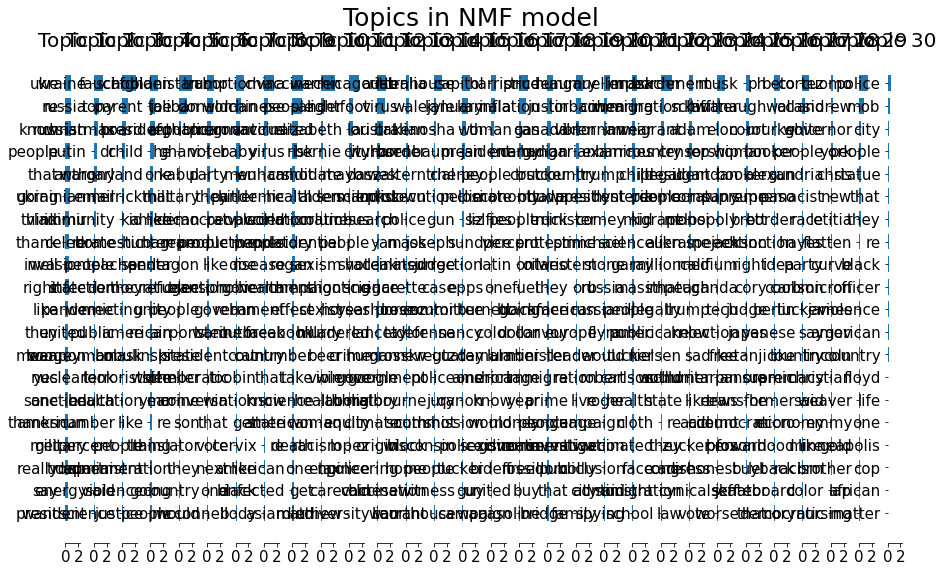

In [112]:
topic_word_plot()